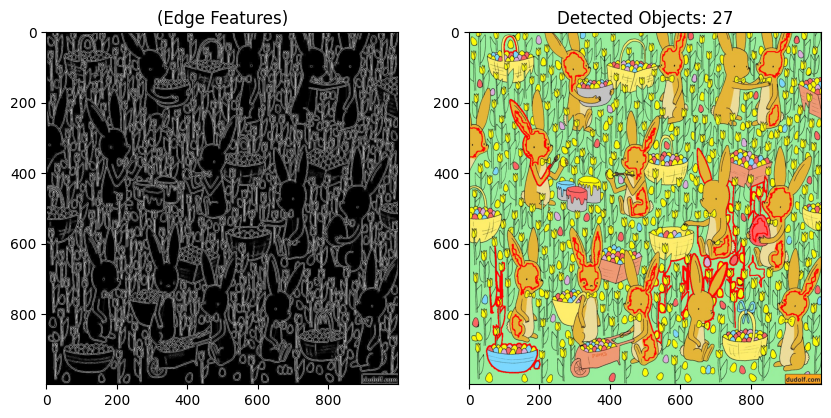

27

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
# Define a convolution kernel to detect rabbit-like features (edges and textures)
conv_kernel = np.array([[-1, 0, -1],
                         [0,  4, 0],
                         [-1, 0, -1]])

# Apply the convolution operation
image = cv2.imread("rabbit1.jpeg")
gray = cv2.imread("rabbit1.jpeg", cv2.IMREAD_GRAYSCALE)
convolved_image = cv2.filter2D(gray, -1, conv_kernel)

# Apply thresholding to enhance feature response
'''_, binary_conv = cv2.threshold(convolved_image, 50, 255, cv2.THRESH_BINARY)'''
binary_conv = cv2.adaptiveThreshold(
    convolved_image, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 11, 2
)
# Find contours in the thresholded convolved image
conv_contours, _ = cv2.findContours(binary_conv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#print(conv_contours)
# Filter contours based on size to count objects
min_area = 1000
max_area = 5000
filtered_conv_contours = []
for cnt in conv_contours:
    area = cv2.contourArea(cnt)
    if min_area < area < max_area:
        # Optional: Filter by aspect ratio (e.g., rabbits are longer than they are wide)
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = w / h
        if 0.4 < aspect_ratio < 0.8:  # Adjust based on expected shape
            filtered_conv_contours.append(cnt)

# Draw contours on the original image
conv_output_image = image.copy()
cv2.drawContours(conv_output_image, filtered_conv_contours, -1, (0, 0, 255), 2)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(convolved_image, cmap='gray')
plt.title("(Edge Features)")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(conv_output_image, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Objects: {len(filtered_conv_contours)}")
cv2.imwrite("rabbit_detected.jpg", conv_output_image)
plt.show()

# Return the number of detected objects
len(filtered_conv_contours)
